# Plot generation

This notebook reads the result files and generates plots. 

In [77]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: "{:0.2e}".format(x))

In [78]:
df = pd.read_csv('results/results.csv', delimiter  = ',', index_col = 'Methods')

In [79]:
labels = ['qDRIFT', 'Rand. Hamilt.', "Taylor naive", "Taylor on-the-fly", "Config. interaction",
        "Low depth Trotter", "L. d. Taylor naive", "L. d. Tay. on-the-fly", "Linear T", "Sparsity low-rank", 
        "Interaction picture"]
print(df.index)
df.index = labels
#df.index.name = 'Methods'
df

Index(['qdrift', 'rand_ham', 'taylor_naive', 'taylor_on_the_fly',
       'configuration_interaction', 'low_depth_trotter', 'low_depth_taylor',
       'low_depth_taylor_on_the_fly', 'linear_t', 'sparsity_low_rank',
       'interaction_picture'],
      dtype='object', name='Methods')


,hydrofluoric acid,water,ammonia,methane,O2
qDRIFT,1.30e+24,1.53e+24,2.75e+24,4.36e+24,5.46e+24
Rand. Hamilt.,3.05e+24,1.39e+25,8.44e+25,1.15e+26,1.46e+25
Taylor naive,1.18e+17,1.29e+17,1.69e+17,3.75e+18,4.18e+18
Taylor on-the-fly,4.36e+19,5.80e+19,7.80e+19,1.35e+20,2.17e+20
Config. interaction,1.32e+39,3.42e+40,2.67e+40,7.45e+40,6.09e+39
Low depth Trotter,2.01e+26,1.74e+26,7.82e+25,1.27e+26,6.77e+26
L. d. Taylor naive,1.33e+13,1.01e+13,5.30e+12,6.75e+12,1.17e+13
L. d. Tay. on-the-fly,2.23e+26,3.72e+26,3.03e+26,6.77e+26,8.84e+26
Linear T,4.58e+15,5.36e+15,2.96e+15,4.67e+15,7.44e+15
Sparsity low-rank,2.07e+12,3.31e+12,5.86e+12,1.26e+13,1.05e+13


In [87]:
df.columns = ['HF', r'H$_2$O', r'NH$_3$', r'CH$_4$', r'O$_2$']
latex_code = df.to_latex(caption='T-gate cost estimates for different molecules and methods obtained using our library', 
                label= 'tab:costs', escape=False, column_format = 'l'+'|p{2cm}'*5)
#latex_code = latex_code.replace("\\\n", "\\ \hline\n")
print(latex_code)

\begin{table}
\centering
\caption{Estimates for different molecules and methods obtained using our library}
\label{tab:costs}
\begin{tabular}{l|p{2cm}|p{2cm}|p{2cm}|p{2cm}|p{2cm}}
\toprule
{} &       HF &   H$_2$O &   NH$_3$ &   CH$_4$ &    O$_2$ \\
\midrule
qDRIFT                & 1.30e+24 & 1.53e+24 & 2.75e+24 & 4.36e+24 & 5.46e+24 \\
Rand. Hamilt.         & 3.05e+24 & 1.39e+25 & 8.44e+25 & 1.15e+26 & 1.46e+25 \\
Taylor naive          & 1.18e+17 & 1.29e+17 & 1.69e+17 & 3.75e+18 & 4.18e+18 \\
Taylor on-the-fly     & 4.36e+19 & 5.80e+19 & 7.80e+19 & 1.35e+20 & 2.17e+20 \\
Config. interaction   & 1.32e+39 & 3.42e+40 & 2.67e+40 & 7.45e+40 & 6.09e+39 \\
Low depth Trotter     & 2.01e+26 & 1.74e+26 & 7.82e+25 & 1.27e+26 & 6.77e+26 \\
L. d. Taylor naive    & 1.33e+13 & 1.01e+13 & 5.30e+12 & 6.75e+12 & 1.17e+13 \\
L. d. Tay. on-the-fly & 2.23e+26 & 3.72e+26 & 3.03e+26 & 6.77e+26 & 8.84e+26 \\
Linear T              & 4.58e+15 & 5.36e+15 & 2.96e+15 & 4.67e+15 & 7.44e+15 \\
Sparsity low-rank    

In [81]:
'''
norm_factors = {}
for col in df.columns:
    div = 10**int(np.log10(df[col]['hydrofluoric acid']))
    norm_factors[col] = div
    #df[str(col) + '_normal'] = df[col]/div

data = [df[col] for col in df.columns if '_normal' in str(col)]
headers = [col[:-7] for col in df.columns if '_normal' in str(col)]
print(headers)
df_normal = pd.concat(data, axis=1, keys=headers)
df_normal'''

"\nnorm_factors = {}\nfor col in df.columns:\n    div = 10**int(np.log10(df[col]['hydrofluoric acid']))\n    norm_factors[col] = div\n    #df[str(col) + '_normal'] = df[col]/div\n\ndata = [df[col] for col in df.columns if '_normal' in str(col)]\nheaders = [col[:-7] for col in df.columns if '_normal' in str(col)]\nprint(headers)\ndf_normal = pd.concat(data, axis=1, keys=headers)\ndf_normal"

In [82]:
df.columns

Index(['HF', 'H$_2$O', 'NH$_3$', 'CH$_4$', 'O$_2$'], dtype='object')

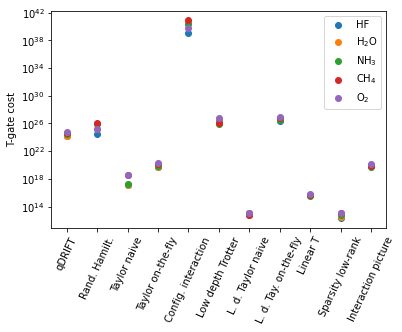

In [83]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

#plt.xlabel("Molecule")
plt.ylabel("T-gate cost")
plt.yscale('log')
plt.xticks(ticks = range(len(labels)), labels = labels, rotation=65)
#plt.legend(loc='upper left')

# Function add a legend  
#plt.legend(list(df.columns), loc='upper left')

for col in df.columns:
    ax.scatter(df.index, df[col], label = col)

ax.legend(bbox_to_anchor=(1, 1))

plt.savefig('results/cost_plot.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [84]:
list(df.columns)

['HF', 'H$_2$O', 'NH$_3$', 'CH$_4$', 'O$_2$']